# Perros y Gatos con Convnets en Keras CIFAR 10


Se va a utilizar el dataset CIFAR 10 de 60000 imágenes a color de 32x32 de imágnes de 10 categorías. Para clasificar únicamente perros y gatos se deben obtener estas categorías del dataset.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

Here are the classes in the dataset, as well as 10 random images from each:
airplane 										
automobile 										
bird 										
cat 										
deer 										
dog 										
frog 										
horse 										
ship 										
truck 										
Loaded in this way, each of the batch files contains a dictionary with the following elements:

* Data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

* label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

Las categorías de nuestro interés son Perros y Gatos , que corresponden a las etiquetas 5 y 3, respectivamente



Del archivo de Metadatos observamos que las etiquetas de perros y gatos corresponden a los números 5 y 3, respectivamente. Tomando en cuenta esto podemos extraer del arreglo de 10000x3072 de cada batch los elementos que correspondan únicamente a perros o gatos

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


Como vimos el dataset está compuesto de 10 categorías, como sólo nos interesa clasificar entre perros y gatos, debemos extraer sólo aquellas que contengan perros o gatos. Hacemos esto tanto para los datos de entrenamiento como para los datos de validación y obtenemos los siguentes arreglos de 10000 imágenes de entrenamiento y 2000 de validación

In [2]:
import numpy as np
t=[]
l=[]

for i in range(0,y_train[:,0].size):
    if y_train[i,0]==5:
        t.append(x_train[i,:,:,:].tolist())
        l.append(1)
    elif y_train[i,0]==3:
        t.append(x_train[i,:,:,:].tolist())
        l.append(0)
    
train=np.array(t)
ltrain=np.array(l)
print('Tamaño de los datos de entrenamiento',train.shape)
print('Tamaño de las etiquetas de entrenamiento',ltrain.shape)

t=[]
l=[]

for i in range(0,y_test[:,0].size):
    if y_test[i,0]==5:
        t.append(x_test[i,:,:,:].tolist())
        l.append(1)
    elif y_test[i,0]==3:
        t.append(x_test[i,:,:,:].tolist())
        l.append(0)

test=np.array(t)
ltest=np.array(l)
print('Tamaño de los datos de prueba',test.shape)
print('Tamaño de las etiquetas de prueba',ltest.shape)

Tamaño de los datos de entrenamiento (10000, 32, 32, 3)
Tamaño de las etiquetas de entrenamiento (10000,)
Tamaño de los datos de prueba (2000, 32, 32, 3)
Tamaño de las etiquetas de prueba (2000,)


Para dejar nuestros datos en el formato de entrada de nuestro modelo debemos cambiar los valores de los pixeles para que se encuentren en el rango de 0 a 1. También debemos convertir los labels a formato one hot.

In [3]:
train = train.astype('float32') / 255
test = test.astype('float32') / 255

## Definición del modelo

Vamos a definir un modelo:
* que recibe un tensor con las instancias de imágen con tres ejes con la dimensionalidad (32, 32, 3), 
* con 4 capas convolucionales 2D, todas con filtros 3x3 y función de activación RELU; la primera con 32 filtros, la segunda con 64 filtros, y la tercera y cuarta con 128 filtros.
* con 3 capas intermedias de MAX pooling que toman las salidas de las capas convolucionales.
* con una capa Flatten que permite cambiar la representación de las salidas de las capas convolucionales a un tensor de un solo eje
* con dos capas Dense, fully connected, la primera con 512 neuronas y RELU, la segunda, la capa de salida, con 1 sola neurona que utiliza una función sigmoide para clasificar las instancias en dos clases (binarias).
* una capa de dropout entre las capas densas con probabilidad de 30%.

In [4]:
import keras
from keras import layers
from keras import models

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),  padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),  padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

Tenemos en total 1'142.849 parámetros!

Ahora compilamos el modelo con un rmsprop, y una función de perdida de binary_crossentropy.


In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [12]:
history = model.fit(train,ltrain,epochs=50,batch_size=50,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 3s 334us/step - loss: 0.6795 - acc: 0.5620 - val_loss: 0.6744 - val_acc: 0.5890
Epoch 2/50
8000/8000 [==============================] - 1s 174us/step - loss: 0.6628 - acc: 0.5983 - val_loss: 0.6760 - val_acc: 0.5985
Epoch 3/50
8000/8000 [==============================] - 1s 167us/step - loss: 0.6442 - acc: 0.6303 - val_loss: 0.6328 - val_acc: 0.6530
Epoch 4/50
8000/8000 [==============================] - 1s 170us/step - loss: 0.6230 - acc: 0.6581 - val_loss: 0.6169 - val_acc: 0.6760
Epoch 5/50
8000/8000 [==============================] - 1s 169us/step - loss: 0.6037 - acc: 0.6735 - val_loss: 0.5993 - val_acc: 0.6805
Epoch 6/50
8000/8000 [==============================] - 1s 172us/step - loss: 0.5843 - acc: 0.6903 - val_loss: 0.5887 - val_acc: 0.6945
Epoch 7/50
8000/8000 [==============================] - 1s 173us/step - loss: 0.5670 - acc: 0.6996 - val_loss: 0.5826 - val_acc: 0.7020


Vemos que en 50 épocas se obtuvo un accuracy del 96% para los datos de entrenamiento y del 74% para los datos de validación. A continuación se corre el modelo en nuestro conjunto de prueba

In [13]:
test_loss, test_acc = model.evaluate(test, ltest)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

2000/2000 [==============================] - 0s 75us/step
test loss: 0.7643420462608337, test accuracy: 0.742


Se obtuvo un accuracy del 76%. A continuación se evalúa el desempeño del modelo observando los datos de accuracy y loss por épocas

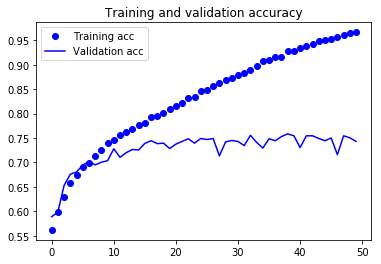

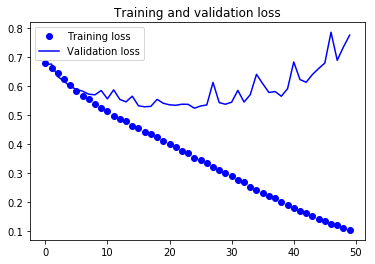

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Vemos que alrededor de la época 15 el accuracy deja de aumentar y el loss comienza a crecer. A continuación se plantea un modelo para clasificar las 10 categorías del dataset

## Clasificador usando todos los datos

Preprocesamiento de los Datos

In [16]:
from keras.utils import to_categorical

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])
print(y_test[0])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


Se corrige el modelo añadiendo 10 neuronas en la última capa densa y cambiando el tipo de activación a softmax

In [17]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                        input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(10, activation='softmax'))

In [18]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [19]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Se corrieron 20 épocas teniendo en cuenta la evaluación del modelo anterior donde se observó que a partir de la 15va época se comenzaba a presentar overfitting

In [20]:
history1 = model1.fit(x_train,y_train,epochs=20,batch_size=50,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 7s 187us/step - loss: 0.2688 - acc: 0.9033 - val_loss: 0.2407 - val_acc: 0.9086
Epoch 2/20
40000/40000 [==============================] - 7s 181us/step - loss: 0.2311 - acc: 0.9104 - val_loss: 0.2188 - val_acc: 0.9146
Epoch 3/20
40000/40000 [==============================] - 7s 182us/step - loss: 0.2146 - acc: 0.9163 - val_loss: 0.2101 - val_acc: 0.9171
Epoch 4/20
40000/40000 [==============================] - 7s 184us/step - loss: 0.2023 - acc: 0.9209 - val_loss: 0.1977 - val_acc: 0.9231
Epoch 5/20
40000/40000 [==============================] - 7s 178us/step - loss: 0.1916 - acc: 0.9253 - val_loss: 0.1913 - val_acc: 0.9254
Epoch 6/20
40000/40000 [==============================] - 7s 182us/step - loss: 0.1823 - acc: 0.9287 - val_loss: 0.1806 - val_acc: 0.9291
Epoch 7/20
40000/40000 [==============================] - 7s 184us/step - loss: 0.1741 - acc: 0.9316 - val_loss: 0.1721 - 

In [21]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Accuracy = ', test_acc)
print('Loss = ', test_loss)

10000/10000 [==============================] - 1s 76us/step
Accuracy =  0.948829994774
Loss =  0.131773523319


## Evaluación del modelo con las 10 categorías

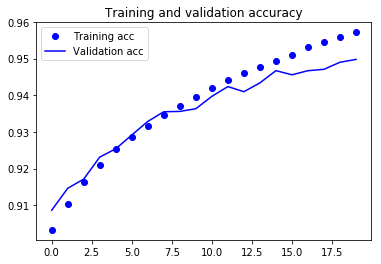

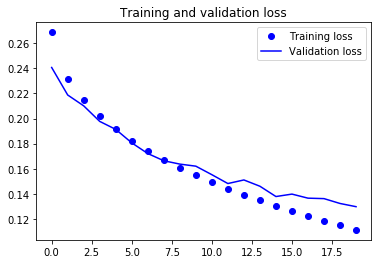

In [22]:
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()